# Signal processing course 2018/2019-1 @ ELTE
# Assignment 4
## 10.15.2018

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [9]:
sns.set()

## Task 1

### Z-transform

The Z-transform converts a discrete-time signal, which is a sequence of real or complex numbers, into a complex frequency domain representation.

It can be defined as either a one-sided or two-sided transform:

#### Bilateral Z-transform
The bilateral or two-sided Z-transform of a discrete-time signal $x[n]$ is the formal power series $X(z)$ defined as

$$
X(z) = \mathcal{Z} \left \{ x[n] \right \} = \sum_{n\ =\ -\infty}^{\infty} x[n] z^{-n}
$$

where $n$ is an integer and $z$ is, in general, a complex number:

$$
z = A e^{j \phi} = A \cdot (\cos{\phi} + j \sin{\phi})
$$

where $A$ is the magnitude of $z$, $j$ is the imaginary unit, and $\phi$ is the complex argument (also referred to as angle or phase) in radians.

#### Unilateral Z-transform
Alternatively, in cases where $x[n]$ is defined only for $n \geq 0$, the single-sided or unilateral Z-transform is defined as

$$
X(z) = \mathcal{Z} \left \{ x[n] \right \} =  \sum_{n\ =\ 0}^{\infty} x[n] z^{-n}
$$

In signal processing, this definition can be used to evaluate the Z-transform of the unit impulse response of a discrete-time causal system.

An important example of the unilateral Z-transform is the probability-generating function, where the component $x[n]$ is the probability that a discrete random variable takes the value $n$, and the function $X(z)$ is usually written as $X(s)$, in terms of $s = z − 1$. The properties of Z-transforms have useful interpretations in the context of probability theory.


### Inverse Z-transform
The inverse Z-transform is

$$
x[n] = \mathcal{Z}^{-1} \left \{ X(z) \right \} = \frac{1}{2 \pi j} \oint_{C} X(z) z^{n-1} dz
$$

where $C$ is a counterclockwise closed path encircling the origin and entirely in the region of convergence (ROC). In the case where the ROC is causal, this means the path $C$ must encircle all of the poles of $X(z)$.


### Region of convergence
The region of convergence (ROC) is the set of points in the complex plane for which the Z-transform summation converges:

$$
\mathrm{ROC} = \left \{ z : \left|\sum_{n\ =\ -\infty}^{\infty}x[n]z^{-n}\right| < \infty \right \}
$$

### Task 1 problems
#### General step function
The $u[n-a]$ symbols in the tasks indicate the step function at $n = a$.

In [2]:
def u_step_function(t, a):

    if(t >= a):
        signal = 1

    else:
        signal = 0
    
    return(signal)

#### Signal 1

$$
x[n] = {\left( \frac{1}{2} \right)}^{n} \left( u[n] - u[n - 10] \right)
$$

In [10]:
def f_1(t):
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):
        signal[i] = (1/2) ** (time[i]) * (u_step_function(time[i], 0) - u_step_function(time[i], 10))
        i += 1
    
    return(time, signal)

In [11]:
t_1 = 15

time_1, signal_1 = f_1(t_1)

#### Plot signal

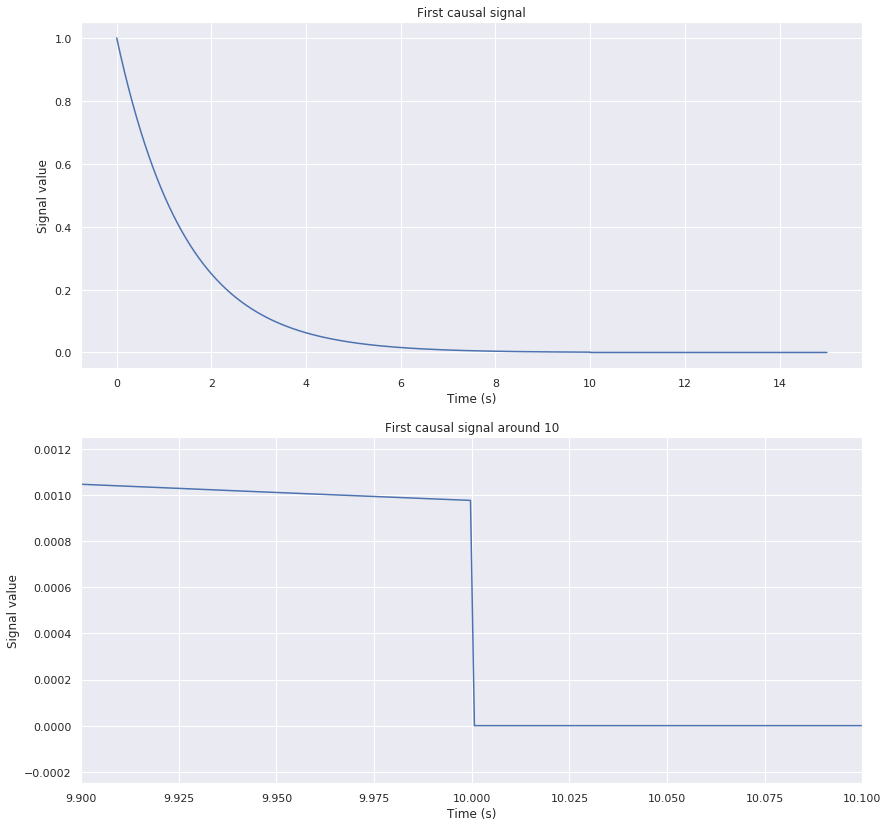

In [20]:
nrows = 2
ncols = 1
fig_1, axes_1 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes_1[0].plot(time_1, signal_1)
axes_1[0].set_title("First causal signal")
axes_1[0].set_xlabel("Time (s)")
axes_1[0].set_ylabel("Signal value")

axes_1[1].plot(time_1, signal_1)
axes_1[1].set_title("First causal signal around 10")
axes_1[1].set_xlabel("Time (s)")
axes_1[1].set_ylabel("Signal value")
axes_1[1].set_xlim(9.9,10.1)
axes_1[1].set_ylim(-0.00025,0.00125)


plt.show()

#### Evaluate the Z-transform

We'll use the unilateral Z-transform, because it's a causal signal:

$$
X(z) = \mathcal{Z} \left \{ x[n] \right \} = \sum_{n\ =\ 0}^{\infty} x[n] z^{-n} = \sum_{n\ =\ 0}^{\infty} \left( {\left( \frac{1}{2} \right)}^{n} \left( u[n] - u[n - 10] \right) \cdot z^{-n} \right)
$$

Because the discrete function has zero value for all arguments, starting from $x = 10$, the Z-transform takes the following form:

$$
\begin{align}
X(z) &= \\ 
&= \mathcal{Z} \left \{ x[n] \right \} = \sum_{n\ =\ 0}^{9} \left( {\left( \frac{1}{2} \right)}^{n} z^{-n} \right) = \sum_{n\ =\ 0}^{9} {\left( 2z \right)}^{-n} \\
&= \frac{1}{2^{0}} \cdot \frac{1}{z^{0}} + \frac{1}{2^{1}} \cdot \frac{1}{z^{1}} + \frac{1}{2^{2}} \cdot \frac{1}{z^{2}} + \dots + \frac{1}{2^{9}} \cdot \frac{1}{z^{9}} 
\end{align}
$$

Sum of the first $n$ element of a geometric series:

$$
S_{n} = a_{1} \frac{q^{n} - 1}{q - 1}
$$

Where $a_1$ is the first element of the series, and $q$ is the constant that each term is multiplied by to get the next term.
Thus:

$$
X(z) = \frac{1}{2^{0}} \cdot \frac{1}{z^{0}} \cdot \frac{{\tfrac{1}{2z}}^{n} - 1}{\tfrac{1}{2z} - 1} \Biggr\rvert_{\ n\ =\ 9} = \frac{{\tfrac{1}{2z}}^{n} - 1}{\tfrac{1}{2z} - 1} \Biggr\rvert_{\ n\ =\ 9} = \frac{{\tfrac{1}{512z^{9}}} - 1}{\tfrac{1}{2z} - 1}
$$

#### Signal 2

$$
x[n] = {\left( \frac{1}{2} \right)}^{\left| n \right|}
$$

In [21]:
def f_2(t):
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):
        signal[i] = (1/2) ** np.abs((time[i]))
        i += 1
    
    return(time, signal)

In [23]:
t_2 = 15

time_2, signal_2 = f_2(t_2)

#### Plot signal

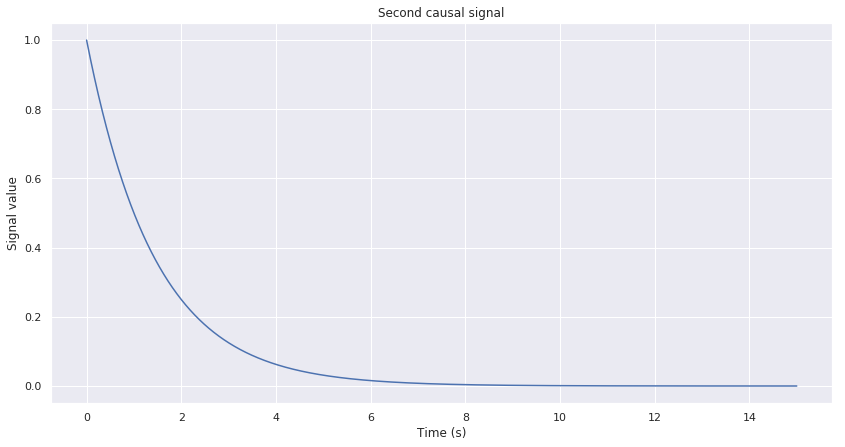

In [31]:
nrows = 1
ncols = 1
fig_2, axes_2 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes_2.plot(time_2, signal_2)
axes_2.set_title("Second causal signal")
axes_2.set_xlabel("Time (s)")
axes_2.set_ylabel("Signal value")

plt.show()

#### Evaluate the Z-transform

We'll use the unilateral Z-transform, because it's also a causal signal, like in the task before. Therefore all $\left| n \right|$ simplifies to $n$:

$$
\begin{align}
X(z) &= \\
&= \mathcal{Z} \left \{ x[n] \right \} = \sum_{n\ =\ 0}^{\infty} x[n] z^{-n} = \sum_{n\ =\ 0}^{\infty} \left( {\left( \frac{1}{2} \right)}^{\left| n \right|} \cdot z^{-n} \right) = \\
&= \sum_{n\ =\ 0}^{\infty} {\left( \frac{1}{2z} \right)}^{\left| n \right|} = \sum_{n\ =\ 0}^{\infty} {\left( 2z \right)}^{-n}
\end{align}
$$

Sum of the first $n$ element of a geometric series:

$$
S_{n} = a_{1} \frac{q^{n} - 1}{q - 1}
$$

Where $a_1$ is the first element of the series, and $q$ is the constant that each term is multiplied by to get the next term.
Thus:

$$
X(z) = \frac{1}{2^{0}} \cdot \frac{1}{z^{0}} \cdot \frac{{\tfrac{1}{2z}}^{n} - 1}{\tfrac{1}{2z} - 1} \Biggr\rvert_{\ n\ =\ \infty} = \frac{{\tfrac{1}{2z}}^{n} - 1}{\tfrac{1}{2z} - 1} \Biggr\rvert_{\ n\ =\ \infty} = \frac{{\tfrac{1}{2^{\infty} \cdot z^{\infty}}} - 1}{\tfrac{1}{2z} - 1} = - \frac{1}{\tfrac{1}{2z} - 1}
$$

#### Signal 3

$$
x[n] = {\left( 5 \right)}^{\left| n \right|}
$$

In [27]:
def f_3(t):
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):
        signal[i] = 5 ** np.abs((time[i]))
        i += 1
    
    return(time, signal)

In [28]:
t_3 = 15

time_3, signal_3 = f_3(t_3)

#### Plot signal

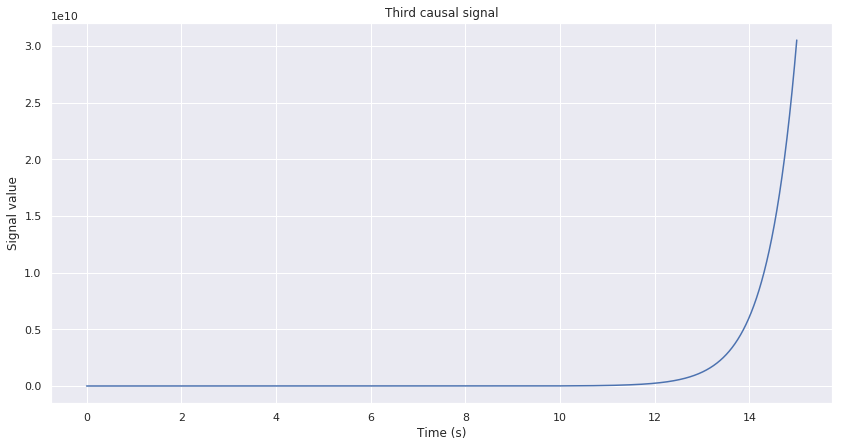

In [30]:
nrows = 1
ncols = 1
fig_3, axes_3 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes_3.plot(time_3, signal_3)
axes_3.set_title("Third causal signal")
axes_3.set_xlabel("Time (s)")
axes_3.set_ylabel("Signal value")

plt.show()

#### Evaluate the Z-transform

We'll use the unilateral Z-transform, because it's also a causal signal, like in the task before. Therefore all $\left| n \right|$ simplifies to $n$:

$$
\begin{align}
X(z) &= \\
&= \mathcal{Z} \left \{ x[n] \right \} = \sum_{n\ =\ 0}^{\infty} x[n] z^{-n} = \sum_{n\ =\ 0}^{\infty} \left( {\left( 5 \right)}^{\left| n \right|} \cdot z^{-n} \right) = \sum_{n\ =\ 0}^{\infty} {\left( \frac{5}{z} \right)}^{\left| n \right|}
\end{align}
$$

Sum of the first $n$ element of a geometric series:

$$
S_{n} = a_{1} \frac{q^{n} - 1}{q - 1}
$$

Where $a_1$ is the first element of the series, and $q$ is the constant that each term is multiplied by to get the next term.
Thus:

$$
X(z) = \frac{5^{0}}{z^{0}} \cdot \frac{{\tfrac{5}{z}}^{n} - 1}{\tfrac{5}{z} - 1} \Biggr\rvert_{\ n\ =\ \infty} = \frac{{\tfrac{5}{z}}^{n} - 1}{\tfrac{5}{z} - 1} \Biggr\rvert_{\ n\ =\ \infty} = \frac{{\tfrac{5^{\infty}}{z^{\infty}}} - 1}{\tfrac{5}{z} - 1} \longrightarrow \infty
$$

#### Signal 4

$$
x[n] = {\left( \frac{1}{2} \right)}^{n} \cdot \cos{\left( \frac{\pi n}{3} \right)} \cdot u[n]
$$

In [40]:
def f_4(t):
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):
        signal[i] = (1/2) ** (time[i]) * np.cos(np.pi * time[i] / 3) * u_step_function(time[i], 0)
        i += 1
    
    return(time, signal)

In [41]:
t_4 = 15

time_4, signal_4 = f_4(t_4)

#### Plot signal

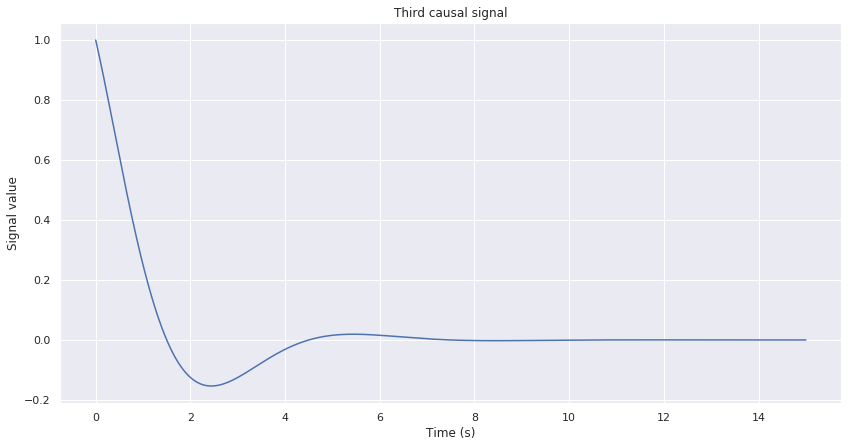

In [42]:
nrows = 1
ncols = 1
fig_4, axes_4 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes_4.plot(time_4, signal_4)
axes_4.set_title("Third causal signal")
axes_4.set_xlabel("Time (s)")
axes_4.set_ylabel("Signal value")

plt.show()

#### Evaluate the Z-transform

We'll use the unilateral Z-transform, because it's also a causal signal, like in the task before. Therefore all $\left| n \right|$ simplifies to $n$:

$$
\begin{align}
X(z) &= \\
&= \mathcal{Z} \left \{ x[n] \right \} = \sum_{n\ =\ 0}^{\infty} x[n] z^{-n} = \sum_{n\ =\ 0}^{\infty} {\left( \frac{1}{2} \right)}^{n} \cdot \cos{\left( \frac{\pi n}{3} \right)} \cdot u[n] \cdot z^{-n} = \\
&= \sum_{n\ =\ 0}^{\infty} {\left( \frac{1}{2} \right)}^{n} \cdot \cos{\left( \frac{\pi n}{3} \right)} \cdot z^{-n} = \sum_{n\ =\ 0}^{\infty} {\left( \frac{1}{2z} \right)}^{n} \cdot \cos{\left( \frac{\pi n}{3} \right)}
\end{align}
$$

Sum of the first $n$ element of a geometric series:

$$
S_{n} = a_{1} \frac{q^{n} - 1}{q - 1}
$$

Where $a_1$ is the first element of the series, and $q$ is the constant that each term is multiplied by to get the next term.

In [57]:
series_max = 100
series_conv = np.empty(series_max)
series_args = np.empty(series_max)

series_sum = 0
for i in range(0,series_max):
    series_sum += (1/4) ** i
    series_conv[i] = series_sum
    series_args[i] = i

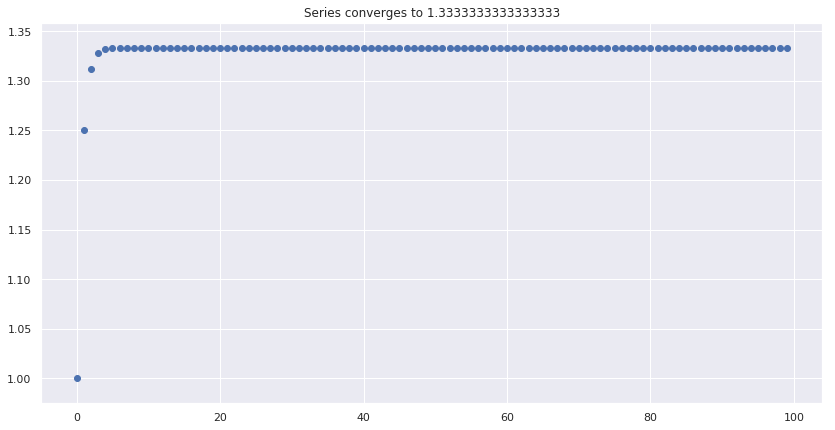

In [58]:
fig_series_conv, axes_series_conv = plt.subplots(figsize=(14,7))

axes_series_conv.scatter(series_args, series_conv)
axes_series_conv.set_title("Series converges to " + str(series_sum))

plt.show()

Thus the Z-trandors evaluates as follows:

$$
\begin{align}
X(z) &= \\
&= {\left( \frac{1}{2z} \right)}^{0} \cdot \cos{\left( \frac{\pi \cdot 0}{3} \right)}
\cdot
\frac{\left( \left( \frac{1}{2z} \right) \cdot \cos{\left( \frac{\pi}{3} \right)} \right)^{n} - 1}{{\left( \frac{1}{2z} \right)} \cdot \cos{\left( \frac{\pi}{3} \right)} - 1} \Biggr\rvert_{\ n\ =\ \infty} = \\
&= \frac{\left( \left( \frac{1}{2z} \right) \cdot \cos{\left( \frac{\pi}{3} \right)} \right)^{n} - 1}{{\left( \frac{1}{2z} \right)} \cdot \cos{\left( \frac{\pi}{3} \right)} - 1} \Biggr\rvert_{\ n\ =\ \infty}
=
\frac{\left( \left( \frac{1}{2z} \right) \cdot \tfrac{1}{2} \right)^{n} - 1}{{\left( \frac{1}{2z} \right)} \cdot \tfrac{1}{2} - 1} \Biggr\rvert_{\ n\ =\ \infty} = \\
&= \frac{\left( \frac{1}{4z} \right)^{n} - 1}{{\left( \frac{1}{4z} \right)} - 1} \Biggr\rvert_{\ n\ =\ \infty}
=
\frac{\frac{4}{3} \cdot \frac{1}{z^{\infty}} - 1}{{\left( \frac{1}{4z} \right)} - 1}
=
\frac{\frac{4}{3} - 1}{{\left( \frac{1}{4z} \right)} - 1} = \\
&= \frac{1}{3} \cdot \frac{1}{{\left( \frac{1}{4z} \right)} - 1}
=
\frac{1}{{\frac{3}{4z}} - 3}
\end{align}
$$